In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
# Local imports
try:
    import galomatch
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import galomatch
import utils

%load_ext autoreload
%autoreload 2

In [2]:
obs = utils.load_2mpp()


cols = ["ra", "dec", "mass_cl", "dist"]
mmains = utils.load_mmains(1)
mmains = galomatch.utils.list_to_ndarray(mmains, cols)
sim = mmains[0, ...]
sim = galomatch.utils.array_to_structured(sim ,cols)
planck = utils.load_planck2015()

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.37it/s]


<IPython.core.display.Javascript object>


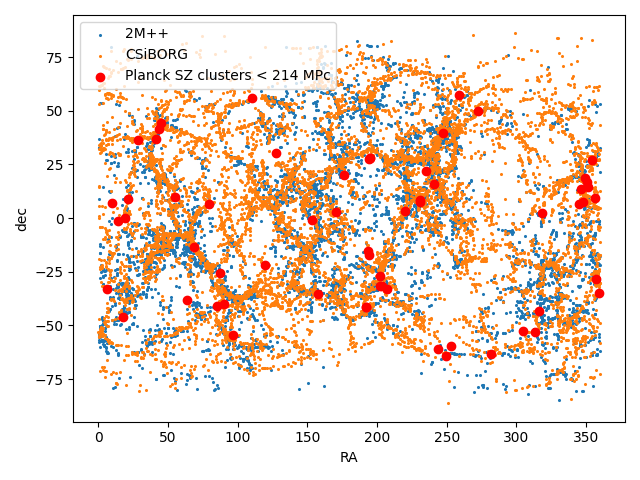

In [3]:
dx = 20
dmin = 125
dmax = dmin + dx

mask_obs = (dmin < obs["CDIST_CMB"]) & (obs["CDIST_CMB"] < dmax)
mask_sim = (dmin < sim["dist"]) & (sim["dist"] < dmax) & (sim["mass_cl"] > 1e12)

width = 6.4
plt.figure(figsize=(width, width*0.75))
plt.scatter(obs["RA"][mask_obs], obs["DEC"][mask_obs], s=1.5, label="2M++")
plt.scatter(sim["ra"][mask_sim] , sim["dec"][mask_sim], s=1.5, label="CSiBORG")
plt.scatter(planck["RA"], planck["DEC"], label="Planck SZ clusters < 214 MPc", c="red")


plt.legend()
plt.xlabel("RA")
plt.ylabel("dec")
plt.tight_layout()
# plt.savefig("../plots/2mpp_overlap.png", dpi=450)
plt.show()